# Installing the necessary libraries if not installed

In [ ]:
# pip install lcensemble

# Importing the necessary libraries

In [1]:
import pandas as pd
import seaborn as sns

# Reading in the dataset

In [2]:
df = pd.read_csv("german_credit.csv")
#df.isnull().any() #Checks for the presence of any Null values in the dataset --> True = Have, False = Don't have
df.isnull().sum() #Shows count of number of Null values in each column of the dataset

Creditability                        0
Account Balance                      0
Duration of Credit Mths              0
Payment Status of Previous Credit    0
Purpose                              0
Credit Amount                        0
Value of Savings and Stocks          0
Length of current employment         0
Instalment per cent                  0
Sex and Marital Status               0
Guarantors                           0
Duration in Current address          0
Most valuable available asset        0
Age                                  0
Concurrent Credits                   0
Type of apartment                    0
No of Credits at this Bank           0
Occupation                           0
No of dependents                     0
Telephone                            0
Foreign Worker                       0
dtype: int64

# Setting up the dummy variables

In [3]:
df = pd.get_dummies(df, columns = ["Payment Status of Previous Credit", "Purpose", "Most valuable available asset", "Occupation", "Telephone",
                                   "Foreign Worker", "Sex and Marital Status", "Account Balance"])

In [4]:
df

,Creditability,Duration of Credit Mths,Credit Amount,Value of Savings and Stocks,Length of current employment,Instalment per cent,Guarantors,Duration in Current address,Age,Concurrent Credits,...,Foreign Worker_1,Foreign Worker_2,Sex and Marital Status_1,Sex and Marital Status_2,Sex and Marital Status_3,Sex and Marital Status_4,Account Balance_1,Account Balance_2,Account Balance_3,Account Balance_4
0,1,18,1049,1,2,4,1,4,21,3,...,1,0,0,1,0,0,1,0,0,0
1,1,9,2799,1,3,2,1,2,36,3,...,1,0,0,0,1,0,1,0,0,0
2,1,12,841,2,4,2,1,4,23,3,...,1,0,0,1,0,0,0,1,0,0
3,1,12,2122,1,3,3,1,2,39,3,...,0,1,0,0,1,0,1,0,0,0
4,1,12,2171,1,3,4,1,4,38,1,...,0,1,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,24,1987,1,3,2,1,4,21,3,...,1,0,0,0,1,0,1,0,0,0
996,0,24,2303,1,5,4,2,1,45,3,...,1,0,0,0,1,0,1,0,0,0
997,0,21,12680,5,5,4,1,4,30,3,...,1,0,0,0,1,0,0,0,0,1
998,0,12,6468,5,1,2,1,1,52,3,...,1,0,0,0,1,0,0,1,0,0


# Plotting df for visualisation

array([[<AxesSubplot:title={'center':'Creditability'}>,
        <AxesSubplot:title={'center':'Duration of Credit Mths'}>,
        <AxesSubplot:title={'center':'Credit Amount'}>,
        <AxesSubplot:title={'center':'Value of Savings and Stocks'}>,
        <AxesSubplot:title={'center':'Length of current employment'}>,
        <AxesSubplot:title={'center':'Instalment per cent'}>,
        <AxesSubplot:title={'center':'Guarantors'}>],
       [<AxesSubplot:title={'center':'Duration in Current address'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Concurrent Credits'}>,
        <AxesSubplot:title={'center':'Type of apartment'}>,
        <AxesSubplot:title={'center':'No of Credits at this Bank'}>,
        <AxesSubplot:title={'center':'No of dependents'}>,
        <AxesSubplot:title={'center':'Payment Status of Previous Credit_0'}>],
       [<AxesSubplot:title={'center':'Payment Status of Previous Credit_1'}>,
        <AxesSubplot:title={'center':'Payme

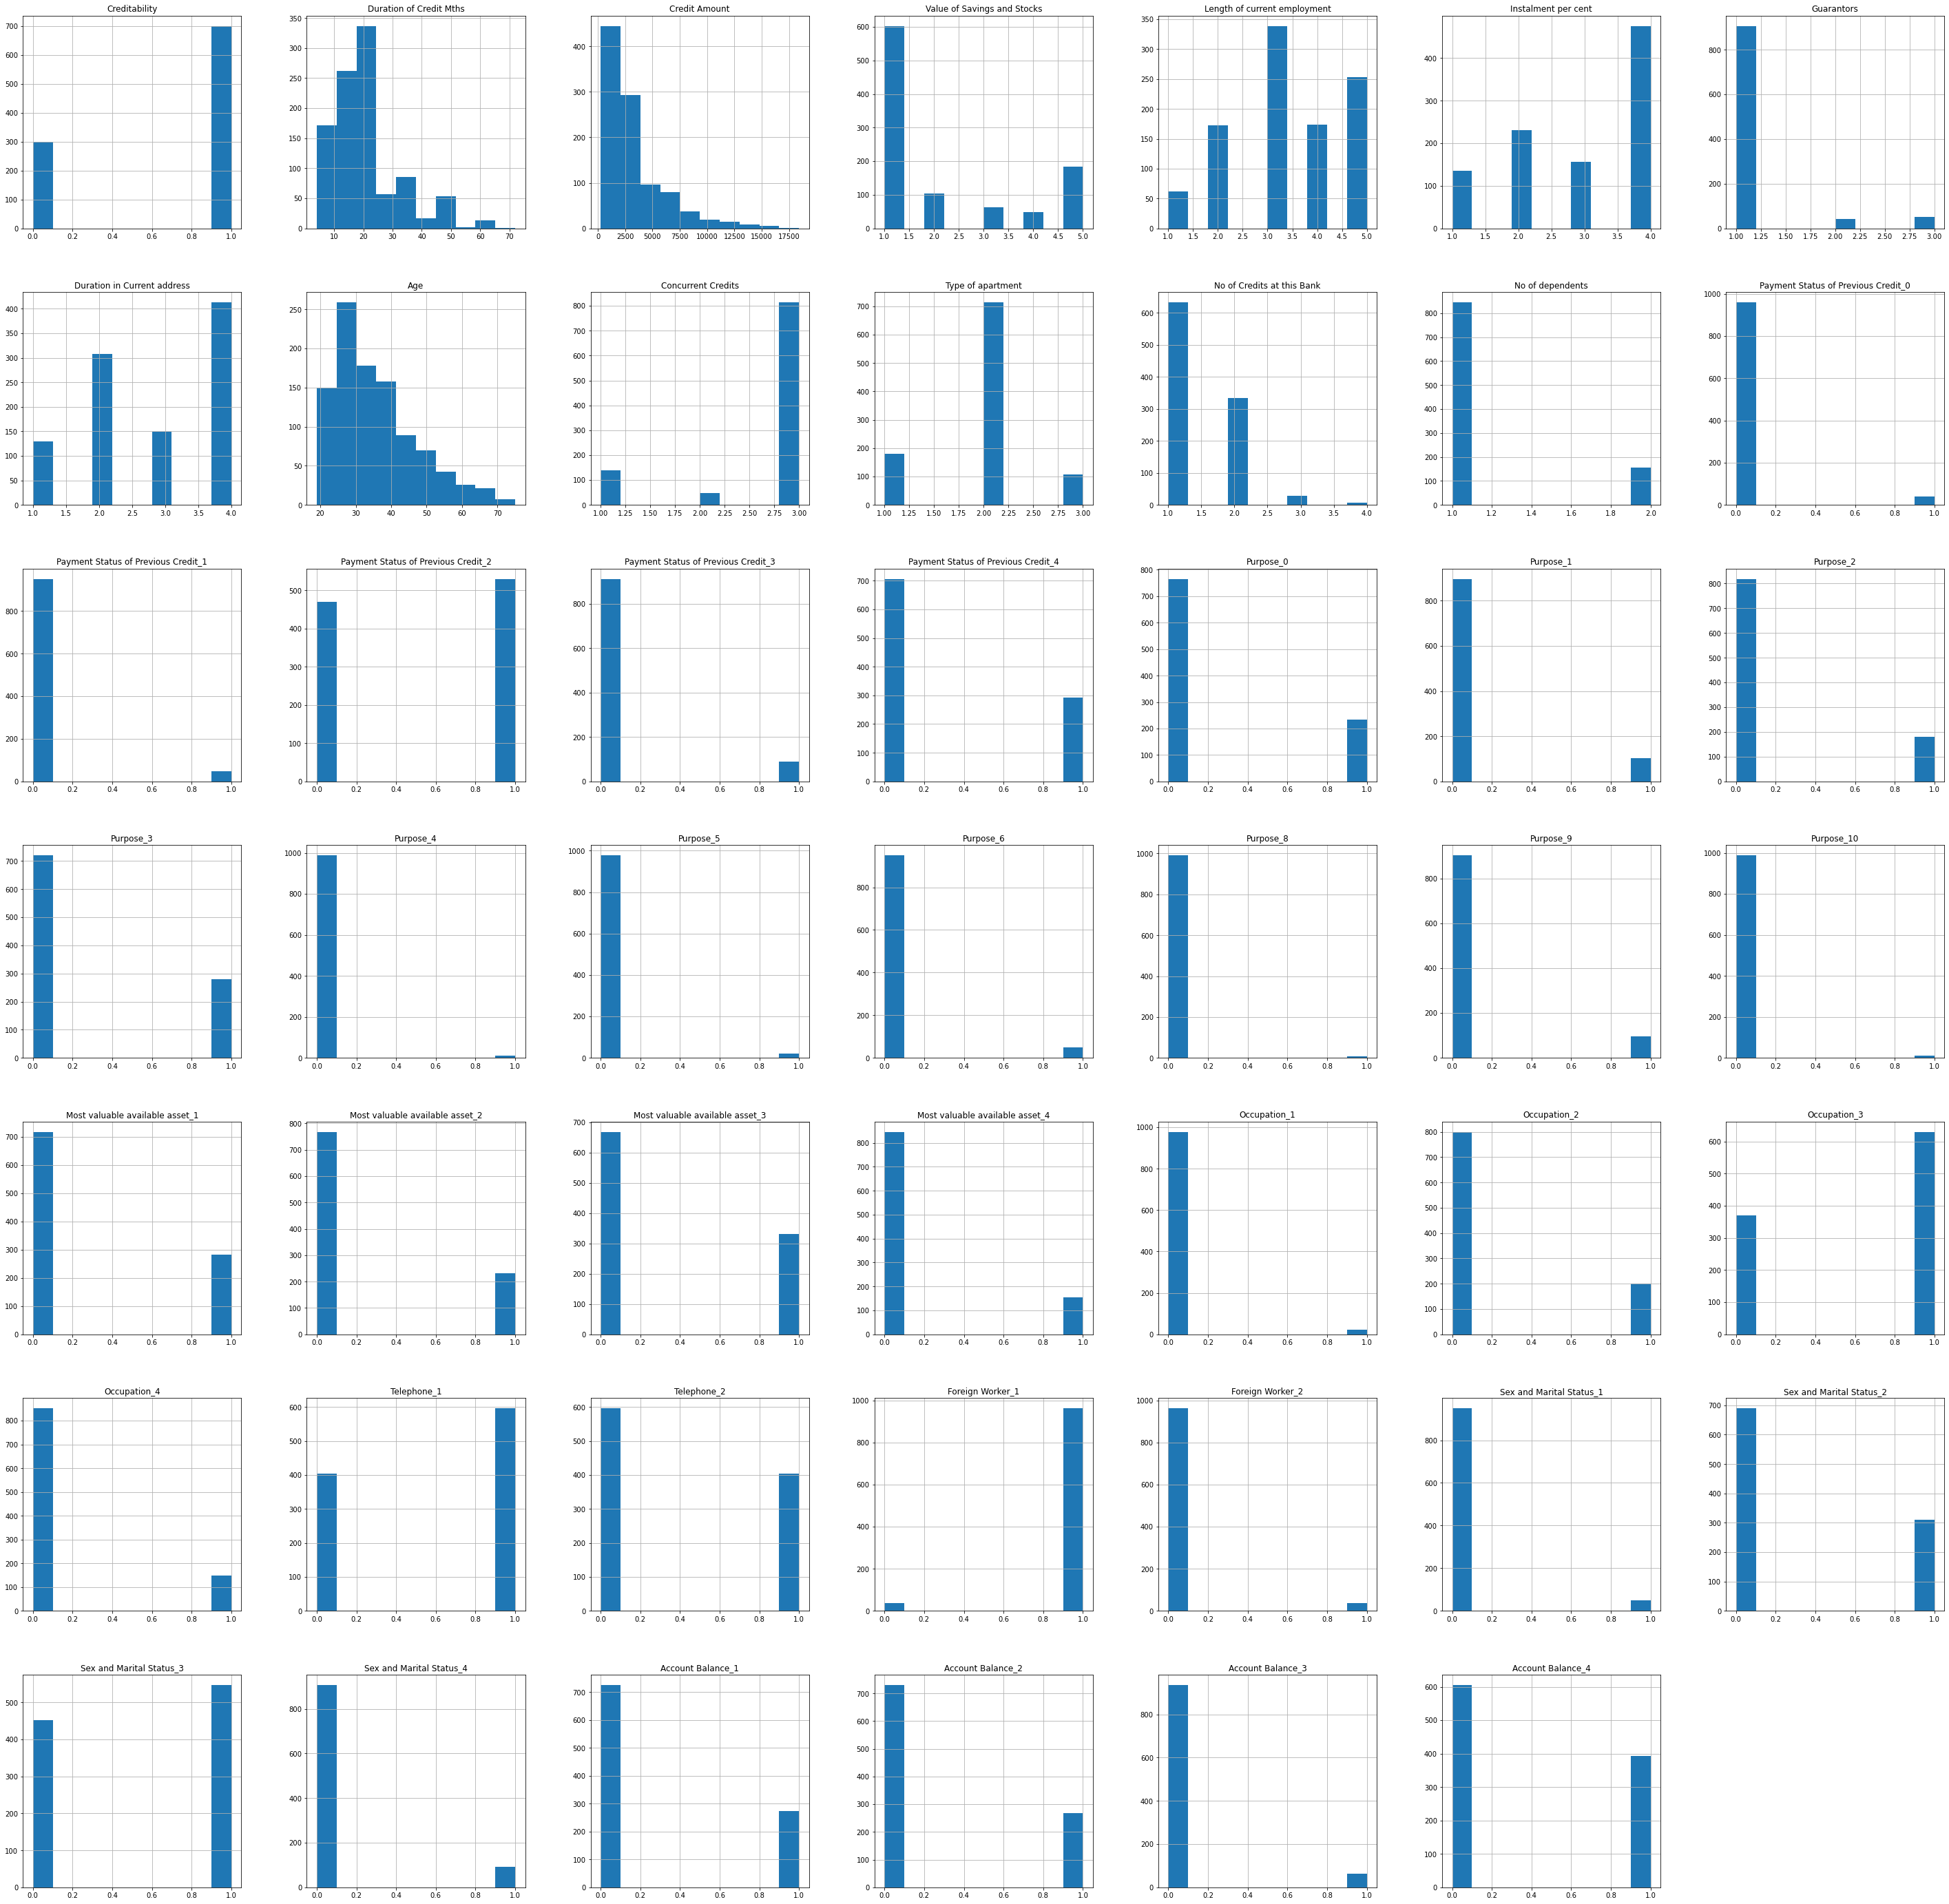

In [5]:
df.hist(figsize = (50,50))

<AxesSubplot:>

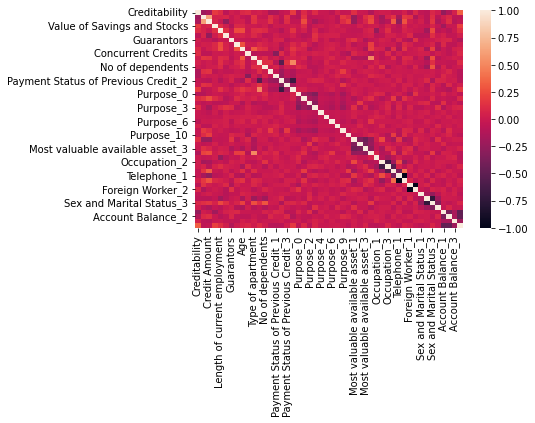

In [6]:
sns.heatmap(df.corr())

<AxesSubplot:>

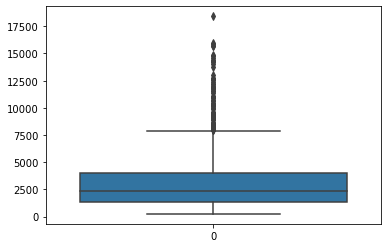

In [7]:
sns.boxplot(data = df["Credit Amount"])

<AxesSubplot:>

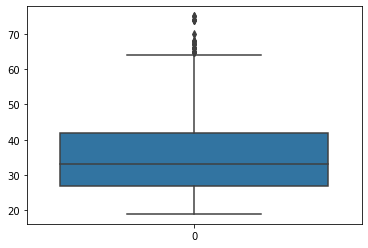

In [8]:
sns.boxplot(data = df["Age"])

<AxesSubplot:xlabel='Creditability', ylabel='count'>

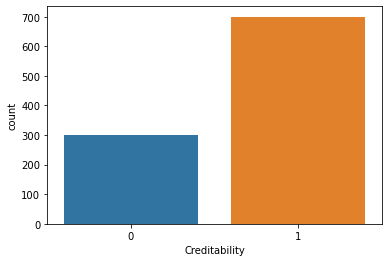

In [10]:
sns.countplot(data = df, x = "Creditability") #countplot is for 1 variable only

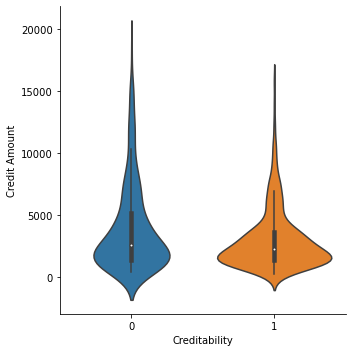

In [14]:
sns.catplot(data = df, x = "Creditability", y = "Credit Amount", kind = "violin") #catplot is for 2 variables

# Performing Train-Test Split

### Creating the X and Y variables

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X = df.drop("Creditability", axis = 1)
Y = df["Creditability"]

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

In [19]:
from scipy import stats

In [20]:
X_train["Credit Amount"] = stats.zscore(X_train["Credit Amount"])
X_test["Credit Amount"] = stats.zscore(X_test["Credit Amount"])

In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import linear_model, tree, ensemble, neural_network

# Logistic Regression

In [22]:
model = linear_model.LogisticRegression(max_iter = 1000)
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print(accuracy_score(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))

0.7
[[ 29  51]
 [ 24 146]]


# Decision Tree

In [25]:
model = tree.DecisionTreeClassifier()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print(accuracy_score(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))

0.648
[[ 30  50]
 [ 38 132]]


# Random Forest

In [26]:
model = ensemble.RandomForestClassifier()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print(accuracy_score(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))

0.756
[[ 30  50]
 [ 11 159]]


# XGBoost

In [23]:
model = ensemble.GradientBoostingClassifier()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print(accuracy_score(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))

0.744
[[ 33  47]
 [ 17 153]]


# Neural Network

In [24]:
model = neural_network.MLPClassifier(max_iter = 1000)
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print(accuracy_score(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))

0.692
[[ 30  50]
 [ 27 143]]
